# COVID-19 Data Analysis Project

## Project Introduction

##### Porpuse : This project's aim is to show with devastating of Covid-19 on the humanity. I prepared the project with the web service that brings the effects of the COVID-19 virus worldwide and the data of the World Health Organization (WHO) in general and in detail. I thank to CollectApi to provide service like this useful.
##### Gains :
 * Increased Python experience by using important Python libraries such as Pandas.
 * Hands on experience to data visualization with matplotlib and seaborn libraries.
 * API usage example
 * Some important tips for data analysis
##### Owner  : İzzet Özdemir
##### Source : collectapi.com (COVID-19 Coronavirus Statistics API)

In [3]:
import http.client as hc
import json as js
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
conn = hc.HTTPSConnection("api.collectapi.com")
headers = {'content-type': "application/json",
           'authorization': "apikey your Token" }
conn.request("GET", "/corona/countriesData", headers=headers)
res = conn.getresponse()
data = res.read()
data_json = data.decode("utf-8")

In [6]:
data_dict = js.loads(data_json)

In [7]:
data_result = data_dict["result"]

In [8]:
mydata = {}

In [9]:
for say in range(len(data_result)-1):
    result_dict = data_result[say]
    new_totalDeaths = result_dict["totalDeaths"]
    if new_totalDeaths=='': new_totalDeaths='0'
    new_totalDeaths = new_totalDeaths.replace(",","")
    new_totalDeaths = int(new_totalDeaths)
    mydata[result_dict["country"]] = new_totalDeaths

In [10]:
df = pd.DataFrame(mydata.values(), index=mydata.keys(), columns=['TotalDeaths'])

In [11]:
df = df["TotalDeaths"].sort_values(ascending=False)

In [12]:
dnum = 20

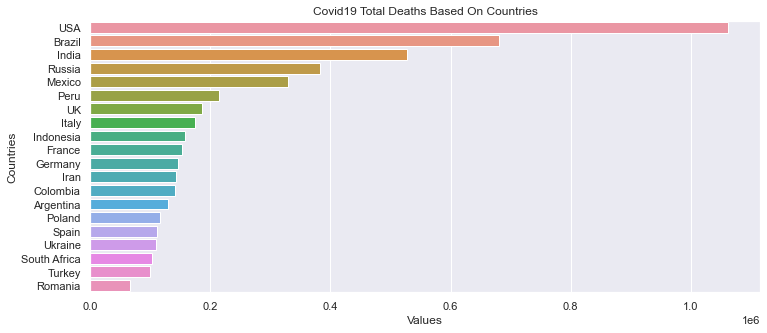

In [15]:
sns.set(rc={'figure.figsize':(12,5)})
ax = sns.barplot(x=(df.head(dnum).values), y=df.head(dnum).index)
ax.set_title('Covid19 Total Deaths Based On Countries') 
ax.set_xlabel('Values')
ax.set_ylabel('Countries')
plt.show()

##### _Sample Data :_
###### {"success": true,
######  "result":[
######    { "country": "China",
######      "totalcases": "80,881",
######      "newCases": "+21",
######      "totaldeaths": "3,226",
######      "newDeaths": "+13",
######      "totalRecovered": "68,709",
######      "activeCases": "8,946" },
######    { "country": "Italy",
######      "totalcases": "27,980",
######      "newCases": "",
######      "totaldeaths": "2,158",
######      "newDeaths": "",
######      "totalRecovered": "2,749",
######      "activeCases": "23,073" },
######    "..."
######  ] }